<a href="https://colab.research.google.com/github/Rohitv97/Data-Science-CE888/blob/master/Lab7/custom_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohitv97","key":"8579c08e06e733ece1116d0112a5e13a"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d trolukovich/food11-image-dataset

100% 1.08G/1.08G [00:14<00:00, 54.3MB/s]
100% 1.08G/1.08G [00:14<00:00, 81.8MB/s]


In [0]:
!unzip -q food11-image-dataset.zip

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 29, 64)       

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True)

In [19]:
batch_size = 128

train_generator = datagen.flow_from_directory(
    'training',
    target_size = (128,128),
    batch_size=batch_size,
    class_mode='categorical',
)
val_generator = datagen.flow_from_directory(
    '/content/validation',
    target_size = (128,128),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    '/content/evaluation',
    target_size = (128,128),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [21]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps=val_generator.samples // batch_size,
                              epochs=10,
                              verbose=1
                              )

Epoch 1/10
77/77 [==============================] - 101s 1s/step - loss: 1.0166 - acc: 0.6514 - mean_squared_error: 0.0429 - val_loss: 1.7766 - val_acc: 0.4811 - val_mean_squared_error: 0.0636
Epoch 2/10
77/77 [==============================] - 102s 1s/step - loss: 0.9459 - acc: 0.6755 - mean_squared_error: 0.0400 - val_loss: 1.5709 - val_acc: 0.5118 - val_mean_squared_error: 0.0599
Epoch 3/10
77/77 [==============================] - 103s 1s/step - loss: 0.8389 - acc: 0.7102 - mean_squared_error: 0.0362 - val_loss: 1.8443 - val_acc: 0.4930 - val_mean_squared_error: 0.0648
Epoch 4/10
77/77 [==============================] - 101s 1s/step - loss: 0.7928 - acc: 0.7239 - mean_squared_error: 0.0344 - val_loss: 1.6058 - val_acc: 0.5330 - val_mean_squared_error: 0.0590
Epoch 5/10
77/77 [==============================] - 101s 1s/step - loss: 0.6627 - acc: 0.7758 - mean_squared_error: 0.0289 - val_loss: 1.7442 - val_acc: 0.5333 - val_mean_squared_error: 0.0607
Epoch 6/10
77/77 [=================

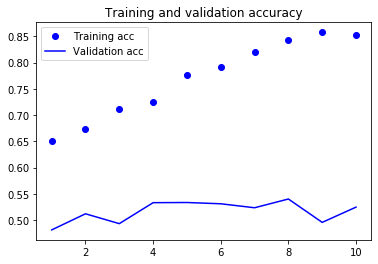

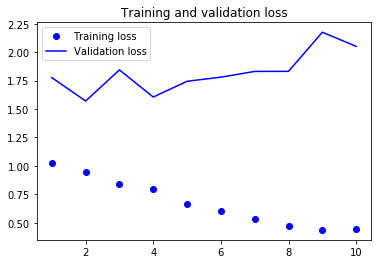

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()